In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# What is pandas

> pandas is a library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

In [2]:
import pandas as pd

In [3]:
df = sns.load_dataset("iris")
print(df.columns)
display(df)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


We can access specific columns in two ways:
* `df['column_name']`: save and can be used with variables
* `df.column_name`: (too) convenient

In [4]:
print(df.species)
print(df['species'])

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object
0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


Typical statistic functions work on dataframes:

In [5]:
print(df.mean())
print(df.max())

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64
sepal_length          7.9
sepal_width           4.4
petal_length          6.9
petal_width           2.5
species         virginica
dtype: object


Or, the data can be summarized with `describe`

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Grouping

Data can be grouped based on columns

In [7]:
df = sns.load_dataset("fmri")
print(df.columns)
display(df.describe())

Index(['subject', 'timepoint', 'event', 'region', 'signal'], dtype='object')


,timepoint,signal
count,1064.000000,1064.000000
mean,9.000000,0.003540
std,5.479801,0.093930
min,0.000000,-0.255486
25%,4.000000,-0.046070
50%,9.000000,-0.013653
75%,14.000000,0.024293
max,18.000000,0.564985


Grouping is done based on one or more columns and a function that is applied on each group (this can be constumized). 

In [8]:
display(df.groupby(['timepoint']).mean())
display(df.groupby(['timepoint']).std())

,signal
timepoint,
0,-0.016662
1,-0.025002
2,-0.012873
3,0.034446
4,0.098194
5,0.137725
6,0.127515
7,0.075660
8,0.013420


,signal
timepoint,
0,0.028326
1,0.030641
2,0.035440
3,0.058260
4,0.092838
5,0.123353
6,0.137332
7,0.129704
8,0.104216


Grouping can be done for multiple columns

In [9]:
display(df.groupby(['timepoint','region']).mean())

signal
timepoint region            
0         frontal  -0.009243
          parietal -0.024080
1         frontal  -0.015625
          parietal -0.034378
2         frontal  -0.007974
          parietal -0.017773
3         frontal   0.027312
          parietal  0.041580
4         frontal   0.077172
          parietal  0.119216
5         frontal   0.107172
          parietal  0.168279
6         frontal   0.093799
          parietal  0.161232
7         frontal   0.044662
          parietal  0.106658
8         frontal  -0.010107
          parietal  0.036947
9         frontal  -0.044168
          parietal -0.019913
10        frontal  -0.053329
          parietal -0.054041
11        frontal  -0.048427
          parietal -0.067962
12        frontal  -0.038509
          parietal -0.066543
13        frontal  -0.029127
          parietal -0.057938
14        frontal  -0.020887
          parietal -0.046433
15        frontal  -0.014907
          parietal -0.036852
16        frontal  -0.012128
          parietal -0.032701
17        frontal  -0.010739
          parietal -0.031997
18        frontal  -0.010283
          parietal -0.033452

## Adding data

In [10]:
df = sns.load_dataset("tips")
print(df.columns)

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


In [11]:
df['fraction_tip'] = df.tip/df.total_bill
print(df.columns)
print(df.fraction_tip)

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'fraction_tip'],
      dtype='object')
0      0.059447
1      0.160542
2      0.166587
3      0.139780
4      0.146808
         ...   
239    0.203927
240    0.073584
241    0.088222
242    0.098204
243    0.159744
Name: fraction_tip, Length: 244, dtype: float64


## Finding data

By index:

In [12]:
df[df.index==0]

,total_bill,tip,sex,smoker,day,time,size,fraction_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447


Conditional

In [13]:
df[df.tip>7]

,total_bill,tip,sex,smoker,day,time,size,fraction_tip
23,39.42,7.58,Male,No,Sat,Dinner,4,0.192288
170,50.81,10.00,Male,Yes,Sat,Dinner,3,0.196812
212,48.33,9.00,Male,No,Sat,Dinner,4,0.186220


In [14]:
df[(df['size']==2)&(df.sex=='Female')&(df.tip<1.5)]

,total_bill,tip,sex,smoker,day,time,size,fraction_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
92,5.75,1.00,Female,Yes,Fri,Dinner,2,0.173913
135,8.51,1.25,Female,No,Thur,Lunch,2,0.146886
215,12.90,1.10,Female,Yes,Sat,Dinner,2,0.085271


## EXERCISE

In [15]:
df = sns.load_dataset("tips")
print(df.columns)

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


Explore this data set:
* Get the mean bill organized by sex, day of the week and the number of guests.
* Get the mean fractional tip for women organized by smoker status and time of day.
* Get row with the maximum tip to bill ratio.

In [16]:
df.groupby(['sex','day','size']).mean()['total_bill']

sex     day   size
Male    Thur  1             NaN
              2       16.528750
              3       20.765000
              4       23.865000
              5       41.190000
              6       34.300000
        Fri   1        8.580000
              2       18.727500
              3             NaN
              4       40.170000
              5             NaN
              6             NaN
        Sat   1             NaN
              2       16.022647
              3       24.374615
              4       30.687273
              5       28.150000
              6             NaN
        Sun   1             NaN
              2       18.278750
              3       24.943333
              4       25.766429
              5       25.575000
              6       48.170000
Female  Thur  1       10.070000
              2       13.785000
              3       17.555000
              4       34.006667
              5             NaN
              6       28.425000
        Fri   1      

In [17]:
df['fraction_tip'] = df.tip/df.total_bill
df[df.sex=='Female'].groupby(['smoker','time']).mean()['fraction_tip']

smoker  time  
Yes     Lunch     0.175270
        Dinner    0.185142
No      Lunch     0.157091
        Dinner    0.156774
Name: fraction_tip, dtype: float64

In [18]:
df[df.fraction_tip==df.fraction_tip.max()]

,total_bill,tip,sex,smoker,day,time,size,fraction_tip
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


# Plotting with pandas:

There are several methods for plotting data from pandas dataframes:

* Extract data and use matplotlib: most work, but most powerfull
* Use pandas plotting functions: quite limited
* Use seaborn: best option is most cases

# Plotting with pandas and seaborn

Typical function call: `plot_type(data=df,x,y,args)`

## Scatter plot

In [19]:
df = sns.load_dataset("titanic")
print(df.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


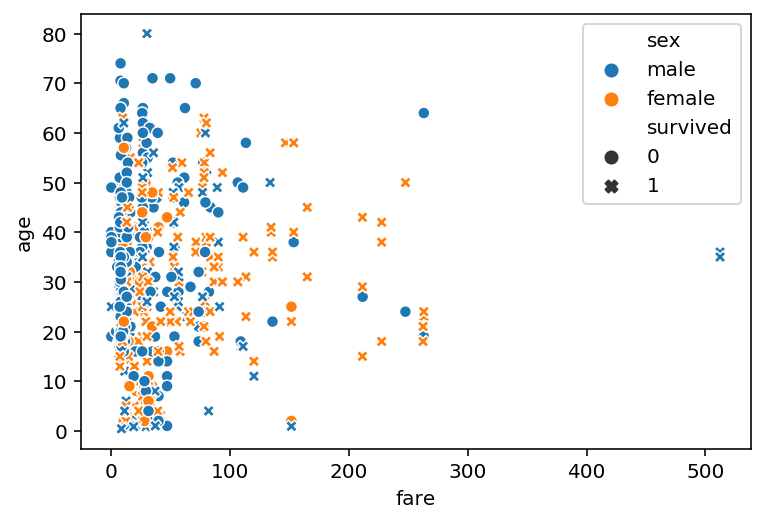

In [20]:
sns.scatterplot(data=df,x='fare',y='age',hue='sex',style='survived')

## EXERCISE

Play around with the columns used for `x`, `y`, `hue`, and `style` and evaluate if a scatterplot is always the best plot?

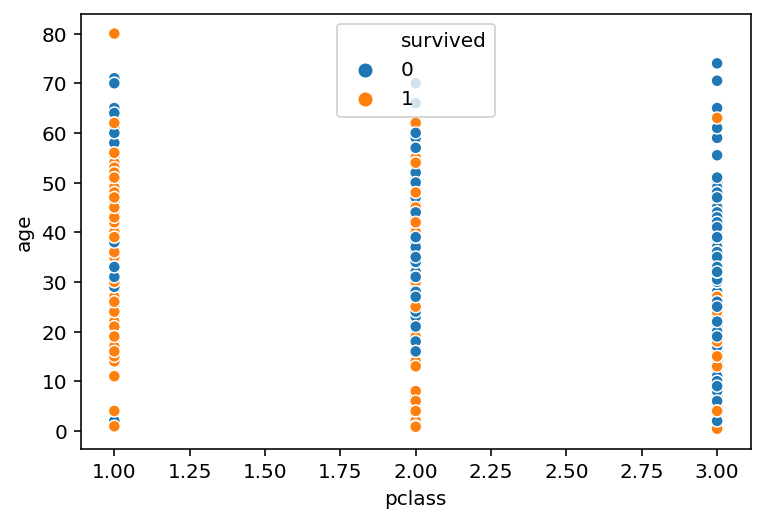

In [21]:
sns.scatterplot(data=df,y='age',x='pclass',hue='survived')

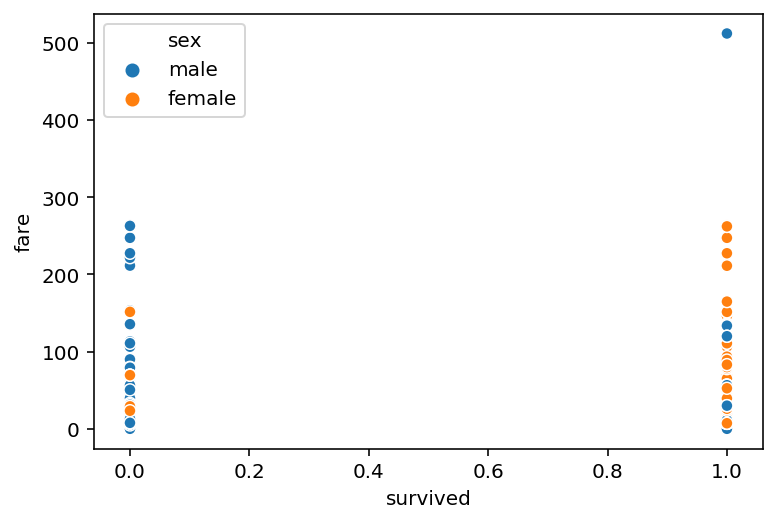

In [22]:
sns.scatterplot(data=df,y='fare',x='survived',hue='sex')

## Stripplot

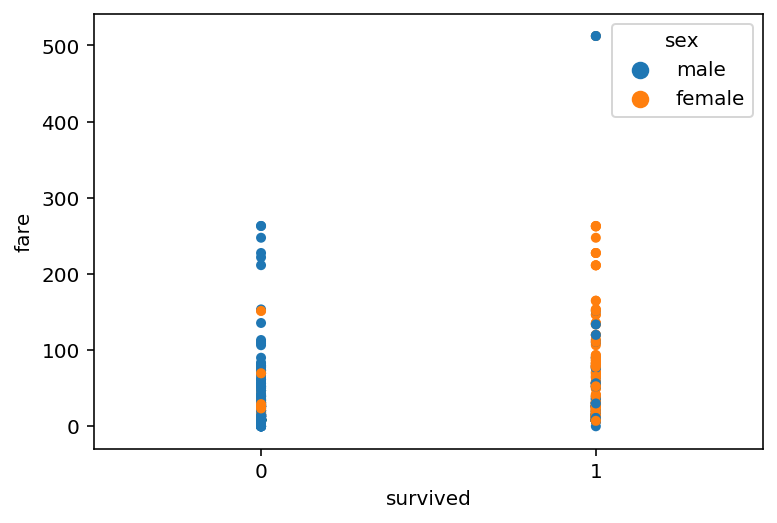

In [23]:
sns.stripplot(data=df,y='fare',x='survived',hue='sex',jitter=False)

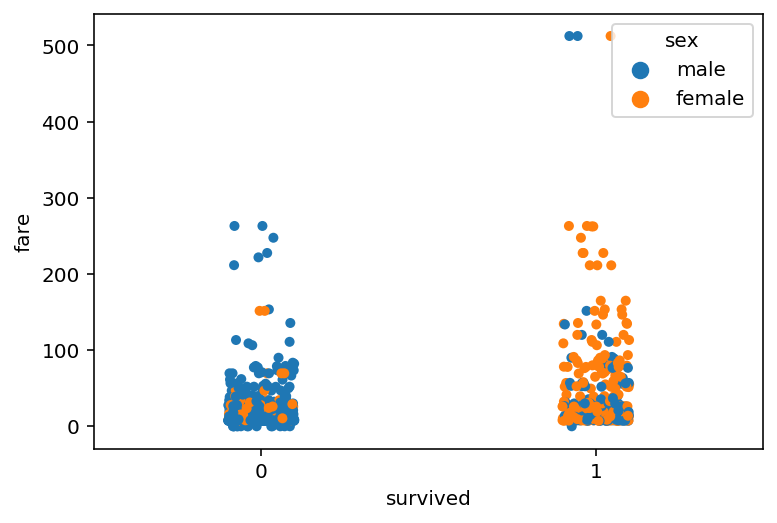

In [24]:
sns.stripplot(data=df,y='fare',x='survived',hue='sex')

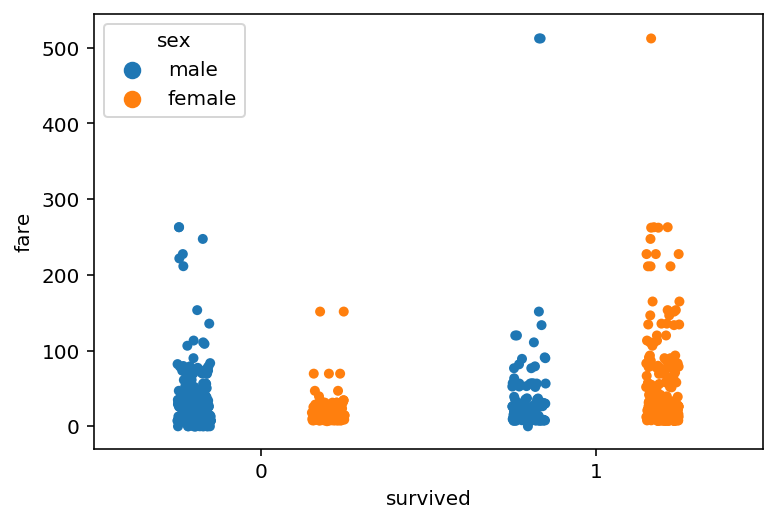

In [25]:
sns.stripplot(data=df,y='fare',x='survived',hue='sex',dodge=True)

## EXCERSICE

Look at the plots from the previous exercise where scatterplots where not practical. See if recreating them with a stripplot helps.

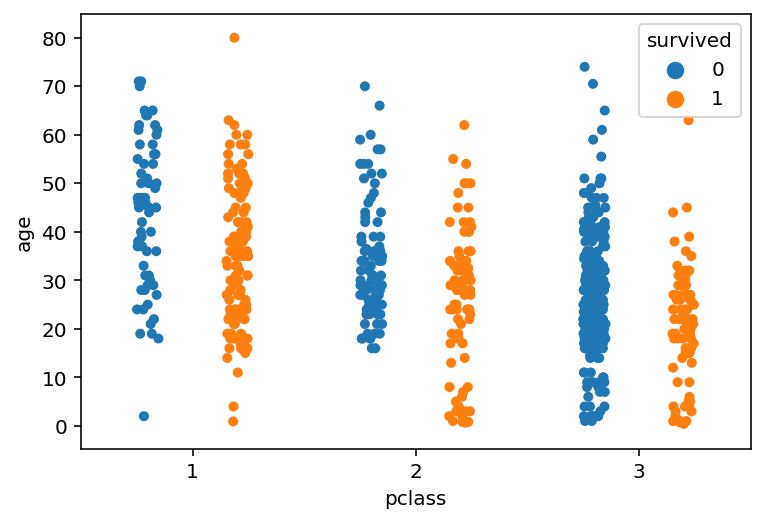

In [26]:
sns.stripplot(data=df,y='age',x='pclass',hue='survived',dodge=True)

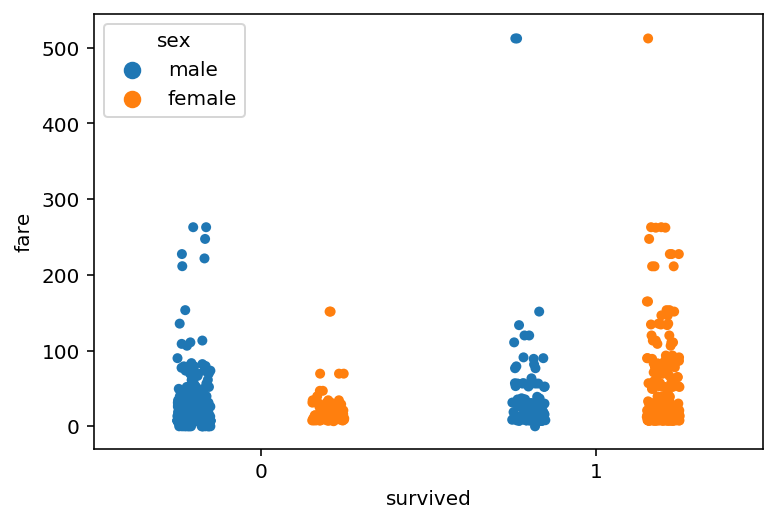

In [27]:
sns.stripplot(data=df,y='fare',x='survived',hue='sex',dodge=True)

## Visualizing the distribution

There is a lot of overlap in the stripplot, and this will get worse if there is more data. Using a swarmplot will slightly improve this, but swarmplots get really slow with many data points

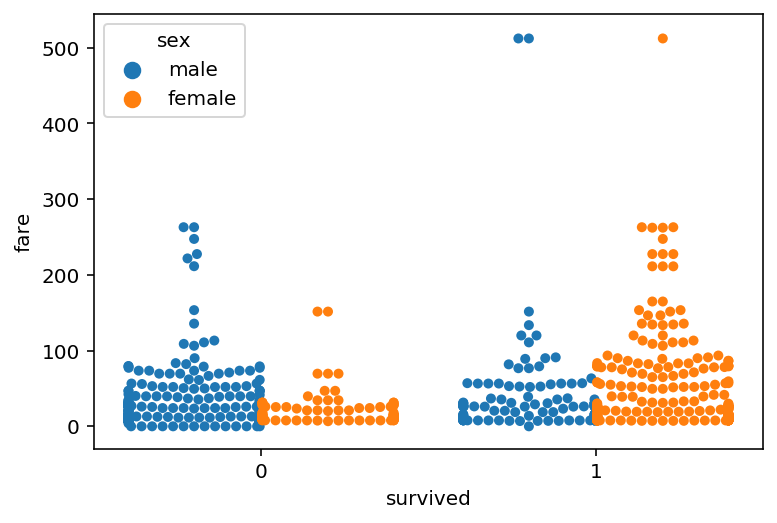

In [28]:
sns.swarmplot(data=df,y='fare',x='survived',hue='sex',dodge=True)

A bar plot may be more appropriate. By default, the errorbars depict the 95% confidence interval.

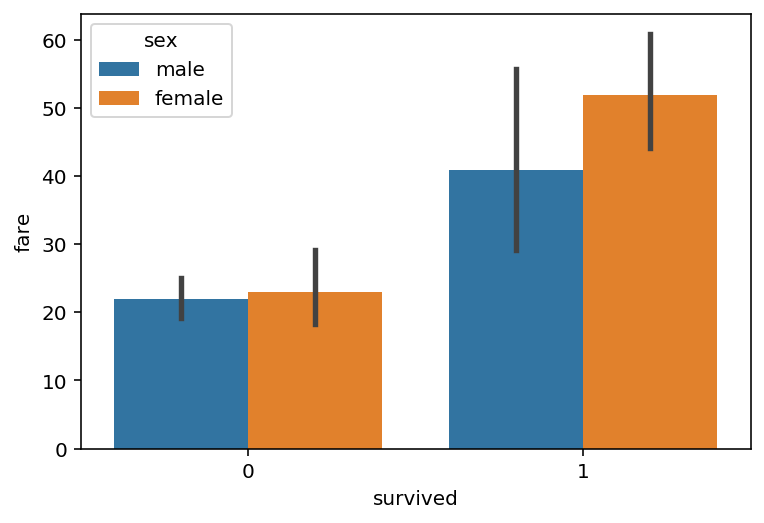

In [29]:
sns.barplot(data=df,y='fare',x='survived',hue='sex',dodge=True,)

You can specify the confidence interval, use the standard deviation (`'sd'`) or choose not to plot error bars (`None`). 

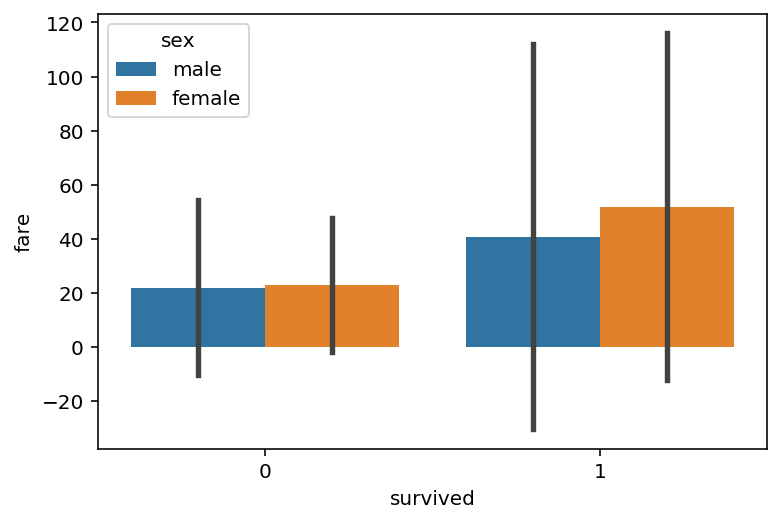

In [30]:
sns.barplot(data=df,y='fare',x='survived',hue='sex',dodge=True,ci='sd')

## EXERCISE

The barcharts hide most of the distribution, better options may be a *boxplot* or a *violinplot*. Try to use `sns.boxplot` and `sns.violinplot`.

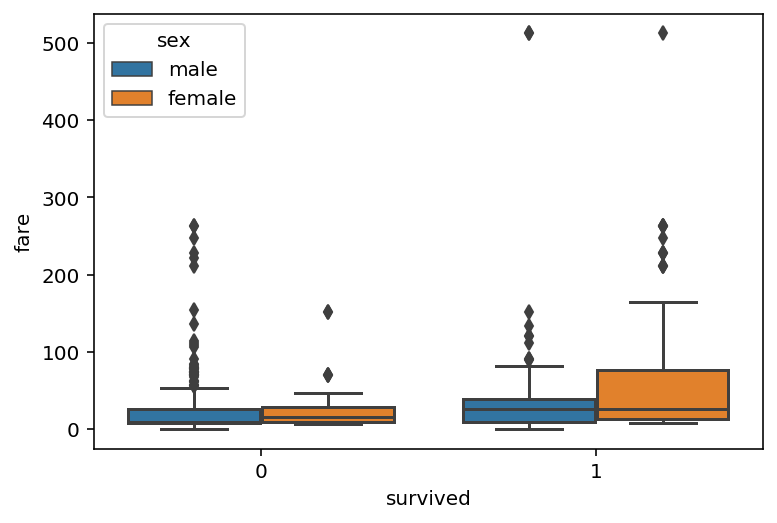

In [31]:
sns.boxplot(data=df,y='fare',x='survived',hue='sex',dodge=True)

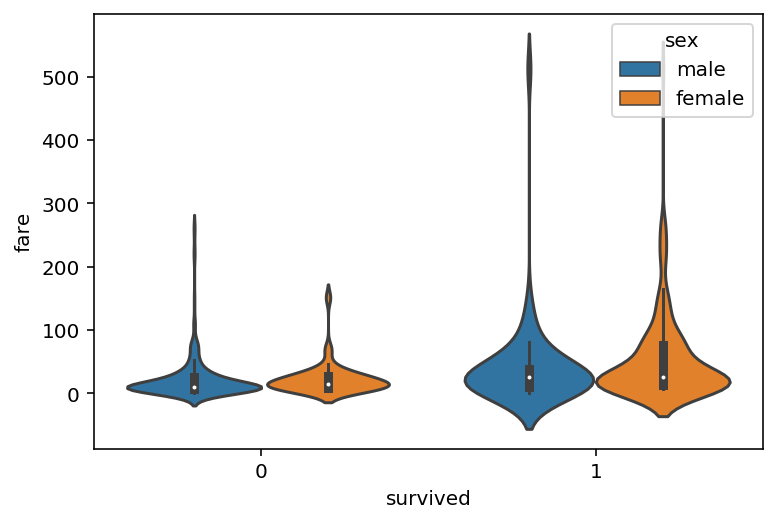

In [32]:
sns.violinplot(data=df,y='fare',x='survived',hue='sex',dodge=True)

## Customization

What I like so much about is Seaborn is that it adds great functionatily, while you still have all the customization of matplotlib.

### Within seaborn functionality

Seaborn's functions have their own arguments and inherit arguments from matplotlib. The syntax used for these is the same as used with matplotlib.

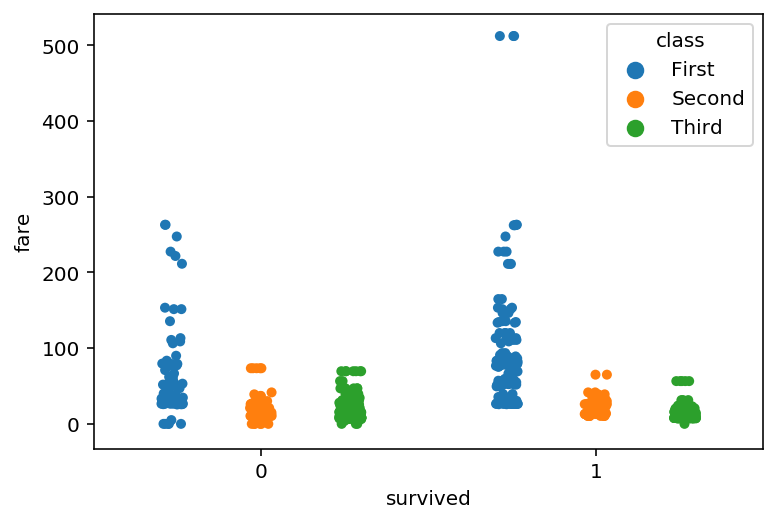

In [33]:
sns.stripplot(data=df,y='fare',x='survived',hue='class',dodge=True,)

`size`, `edgecolor`, and `linewidth` are arguments of `stripplot`, and `marker` is a matplotlib argument that is recognized by `stripplot`.

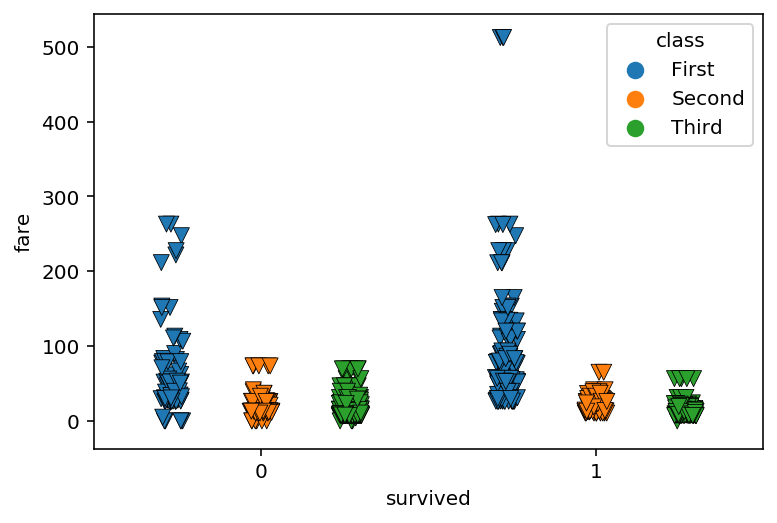

In [34]:
sns.stripplot(data=df,y='fare',x='survived',hue='class',dodge=True,size=8,edgecolor='k',linewidth=.4,marker='v')

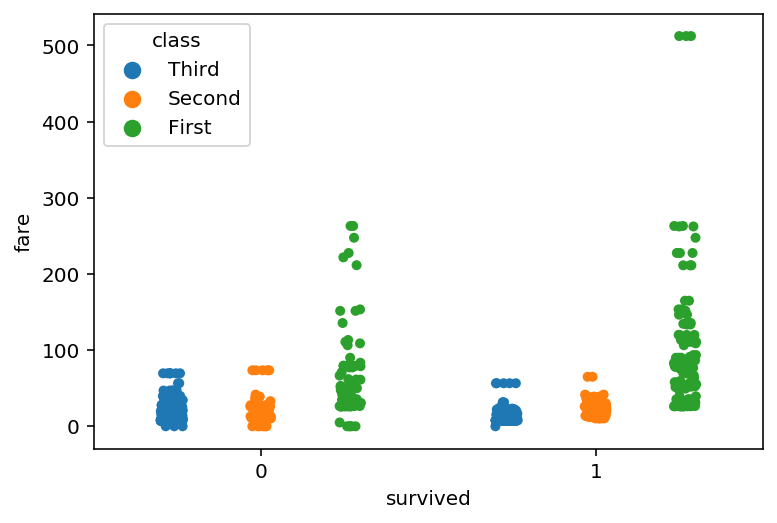

In [35]:
class_order = ['Third','Second','First']
sns.stripplot(data=df,y='fare',x='survived',hue='class',dodge=True,hue_order=class_order)

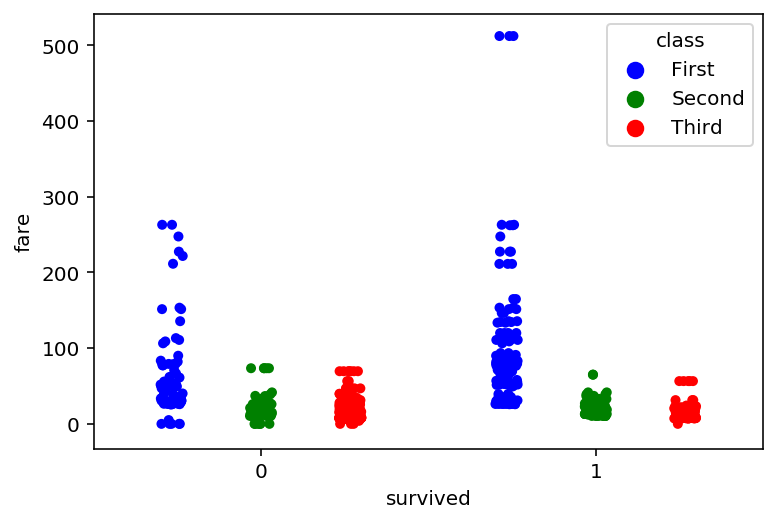

In [36]:
class_colors = {'First':'b','Second':'g','Third':'r'}
sns.stripplot(data=df,y='fare',x='survived',hue='class',dodge=True,palette=class_colors)

### EXERCISE

Make a boxplot with:
* blue for first class, green for second class, and red for third class
* from left to right: third, second, and first class
* make the outliers bigger
* increase the line width of the boxplot

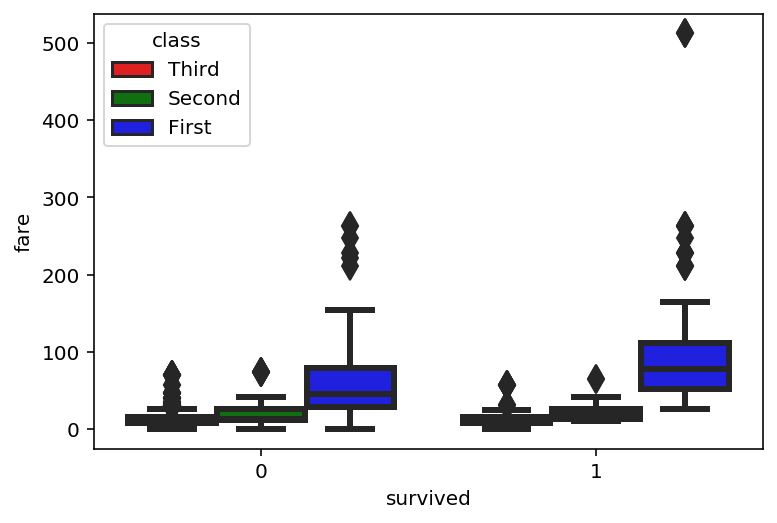

In [37]:
class_order = ['Third','Second','First']
class_colors = {'First':'b','Second':'g','Third':'r'}

sns.boxplot(data=df,y='fare',x='survived',hue='class',dodge=True,hue_order=class_order,
            palette=class_colors,fliersize=10,linewidth=3)

## Mixing with matplotlib

A seaborn plot can be explicitly put in a specific axes object

[Text(0.5, 1.0, 'Titanic')]

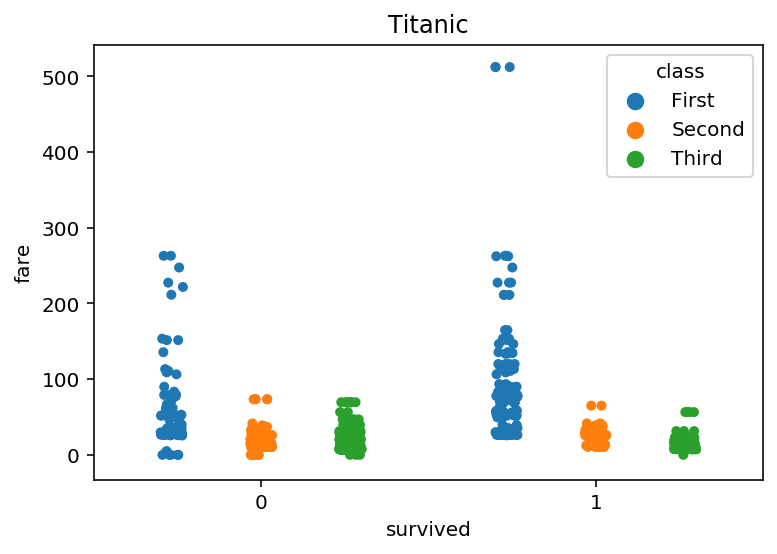

In [38]:
ax = plt.gca()
sns.stripplot(data=df,y='fare',x='survived',hue='class',dodge=True,ax=ax)
ax.set(title='Titanic')

### EXERCISE

Combine what you've learned so far to create a subplot with:
* stripplot
* barplot
* boxplot

You can choose wathever you like to put in those plots

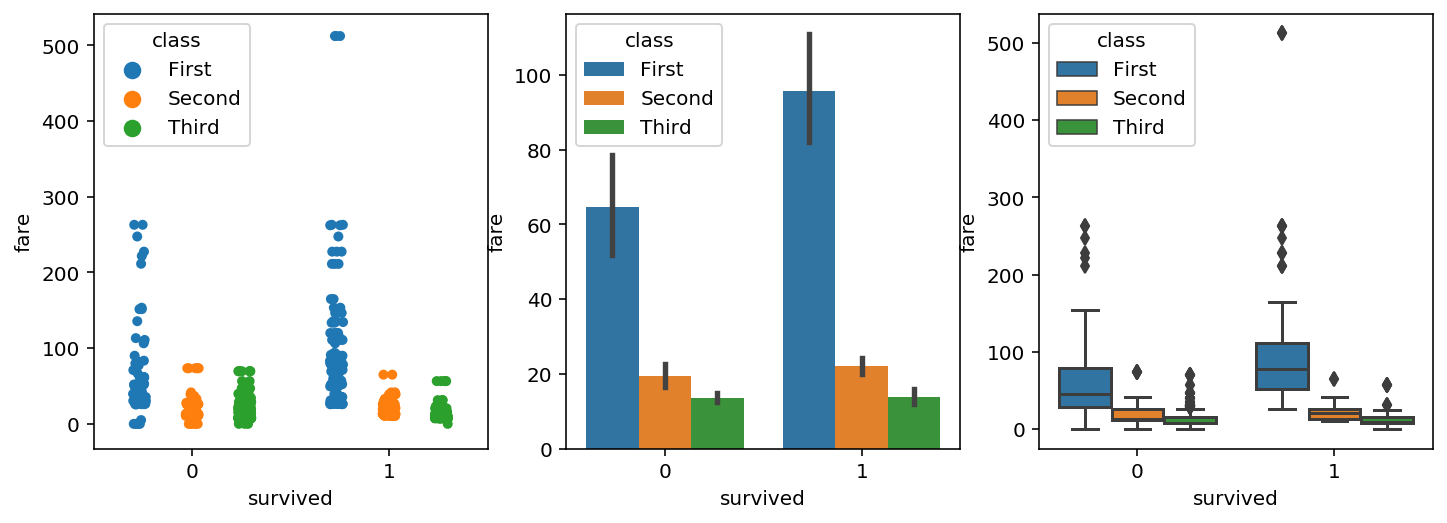

In [39]:
fig,axes = plt.subplots(1,3,figsize=(12,4))
sns.stripplot(data=df,y='fare',x='survived',hue='class',dodge=True,ax=axes[0])
sns.barplot(data=df,y='fare',x='survived',hue='class',dodge=True,ax=axes[1])
sns.boxplot(data=df,y='fare',x='survived',hue='class',dodge=True,ax=axes[2])

## Line plots

Index(['subject', 'timepoint', 'event', 'region', 'signal'], dtype='object')


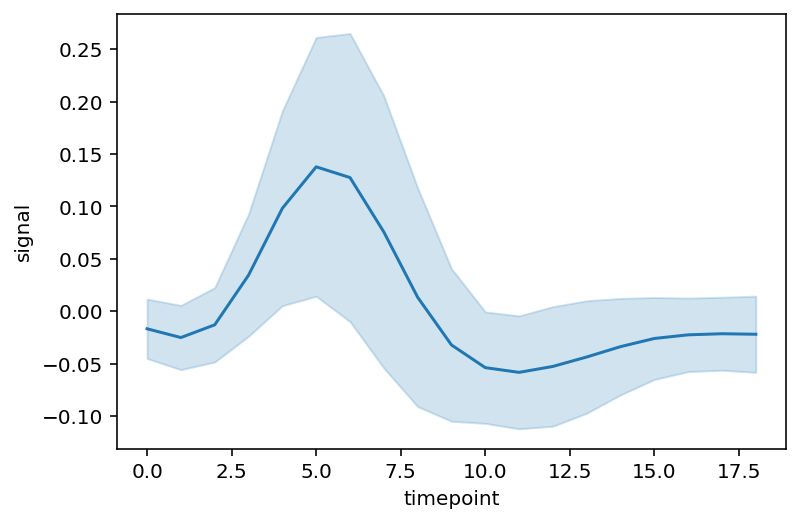

In [40]:
df = sns.load_dataset("fmri")
print(df.columns)
sns.lineplot(data=df,x='timepoint',y='signal',ci='sd')

Of course, we want to separate the data based on event and region:

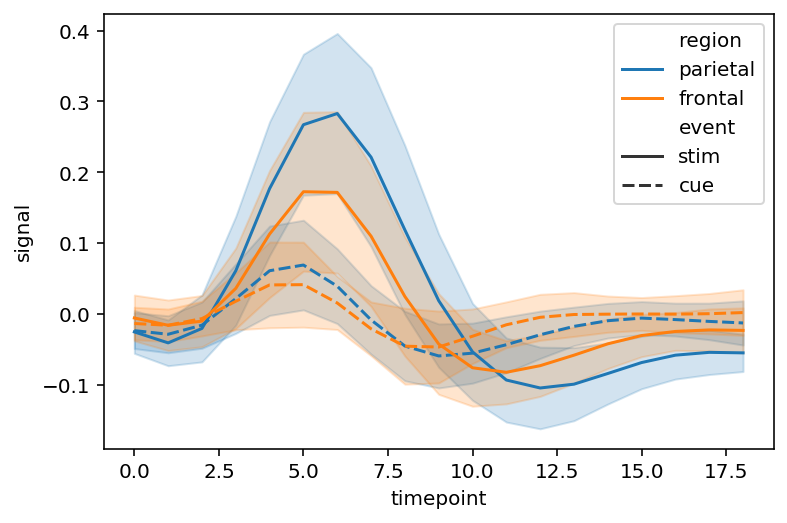

In [41]:
sns.lineplot(data=df,x='timepoint',y='signal',ci='sd',hue='region',style='event')

Line style can be set in multiple ways:
* list of matplotlib styles, e.g.: `['-','--',':']`
* dictionary using dashes: `{'stim':[1,1],'cue':[4,1]}`

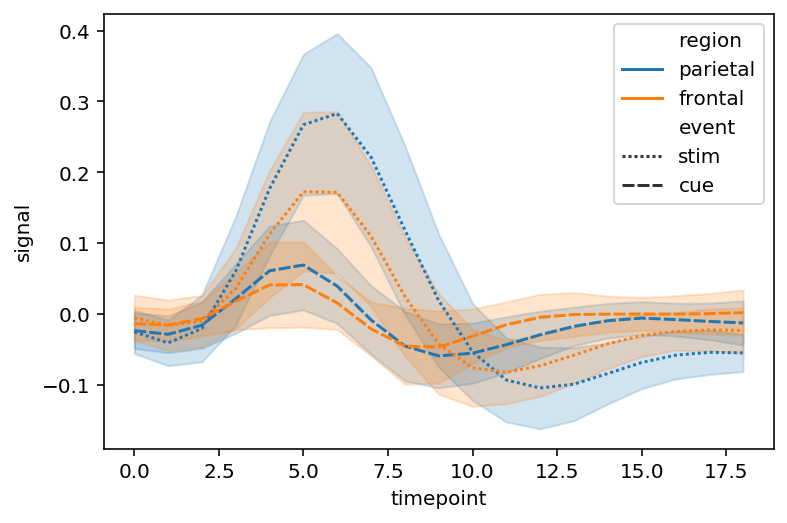

In [42]:
sns.lineplot(data=df,x='timepoint',y='signal',ci='sd',hue='region',style='event',dashes={'stim':[1,1],'cue':[4,1]})

### EXERCISE

Set the colors such that the line for the parietal region is black and the line for the frontal region is blue.

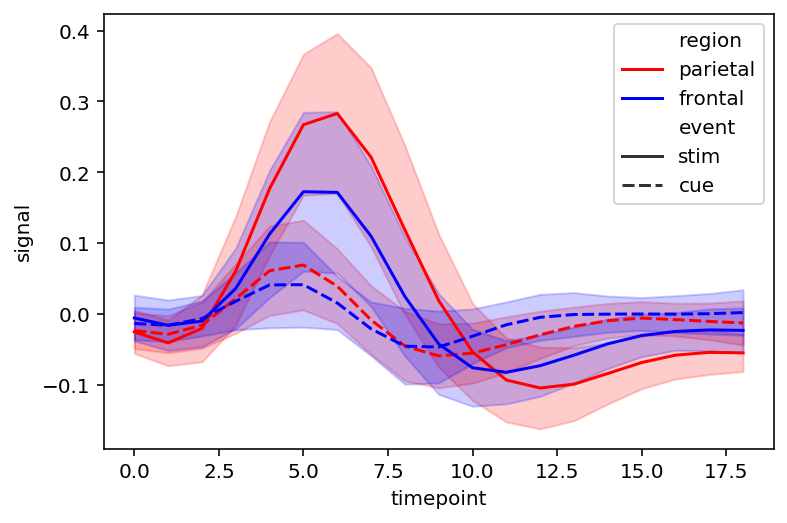

In [43]:
sns.lineplot(data=df,x='timepoint',y='signal',ci='sd',hue='region',style='event',palette={'parietal':'r','frontal':'b'})

### EXERCISE

I don't like this plot, the lines are crossing too much. Therefore, I'd like you to seperate the plot such that I have two plots, one with the mean signal for the parietal region and one for the frontal region and both with lines for stim and cue. You can achieve this by following these steps:
1. select the rows of the data frame for the parietal of frontal region
2. create a line plot for each selected subset
3. use `subplot` to create one figure with two plots

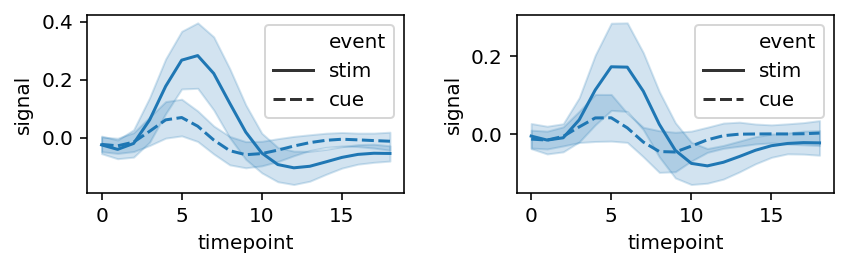

In [44]:
fig,axes = plt.subplots(1,2,figsize=(6,2))
regions = df.region.unique()
for i,region in enumerate(regions):
    # select rows
    sdf = df[df.region==region]
    sns.lineplot(data=sdf,x='timepoint',y='signal',ci='sd',style='event',ax=axes[i])
plt.tight_layout()